# TASK 1 - PREDICTION USING SUPERVISED ML (Data Science & Business Analytics)
To Predict the percentage of marks of a student based on the number of hours he/she studied

# BY - Anaya Mehta

In [4]:
#importing the necessary libraries for data preprocessing
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(r"http://bit.ly/w-data")

In [6]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#checking for null values
print(data.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [8]:
data.shape

(25, 2)

In [9]:
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
data.rename(columns = {'Hours':'hrs','Scores':'scores'},inplace=True)
data.columns

Index(['hrs', 'scores'], dtype='object')

                                                    VISUALIZATION

In [12]:
#importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

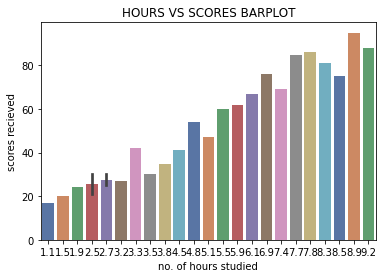

In [13]:
#Creating bar plot
sns.barplot(x = 'hrs',y = 'scores',data = data, palette = "deep")
plt.title('HOURS VS SCORES BARPLOT')
plt.xlabel('no. of hours studied')
plt.ylabel('scores recieved') 
plt.show()

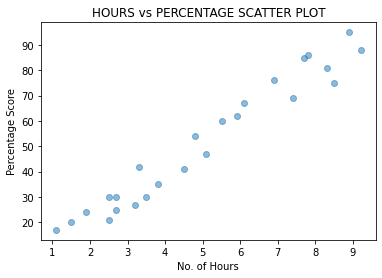

In [14]:
#creating scatter plot
plt.scatter(data['hrs'],data['scores'],alpha=0.5 )
plt.title('HOURS vs PERCENTAGE SCATTER PLOT')  
plt.xlabel('No. of Hours')  
plt.ylabel('Percentage Score')  
plt.show()

                                                TRAINING THE MODEL

In [15]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
#dividing the variables into target and predictor variables
Y=data.scores #Target Variable 
X=data.drop(['scores'],axis=1) #predictor variable

In [17]:
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [18]:
#dividing data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=69)

In [19]:
#Applying the Linear Regression Model
lr = LinearRegression() 
#training the model on train dataset
lr.fit(X_train, Y_train)

LinearRegression()

In [20]:
# The coefficients
print('Coefficients: \n', lr.coef_)
#the intercept
print('Intercept: \n',lr.intercept_)

Coefficients: 
 [10.04742624]
Intercept: 
 0.5548063428562529


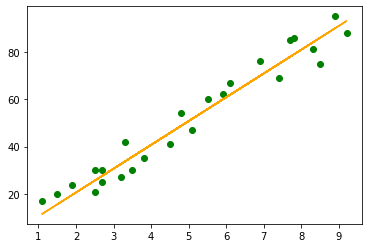

In [21]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_    # y = mx + c

# Plotting for the test data
plt.scatter(X, Y, color = 'green')
plt.plot(X, line, color = 'orange');
plt.show()

In [22]:
#testing the model on test dataset
Y_pred = lr.predict(X_test)
Y_pred

array([74.90576051, 61.8441064 , 25.67337194, 48.78245229, 11.60697521])

In [23]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
19,69,74.905761
18,67,61.844106
16,30,25.673372
21,54,48.782452
14,17,11.606975


                                                MODEL EVALUATION

In [24]:
#importing the necessary libraries
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# The mean squared error linear
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 27.30
Variance score: 0.94


                                                MAKING PREDICTION

In [26]:
h = 9.25
predicted_score = lr.predict([[h]])
print('the percentage of score recived by a student studying for {} hours/day is {}'.format(h,predicted_score))

the percentage of score recived by a student studying for 9.25 hours/day is [93.49349906]
